<a href="https://colab.research.google.com/github/sarthaksolow/startin_on_ml/blob/main/breastcancer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
breast_cancer_dataset= load_breast_cancer()
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [27]:
df=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df['label']=breast_cancer_dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [30]:
df['label'].value_counts()

,count
label,
1,357
0,212


In [31]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [32]:
y

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_test.shape

(114, 30)

In [34]:
X_train.shape

(455, 30)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

**BUILDING** **THE** **NETWORK**

In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [36]:
model=Sequential()
model.add(Flatten(input_shape=(30,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
Total params: 662 (2.59 KB)
Trainable params: 662 (2.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(X_train_std,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
13/13 [==============================] - 1s 39ms/step - loss: 0.7695 - accuracy: 0.4425 - val_loss: 0.6389 - val_accuracy: 0.6304
Epoch 2/10
13/13 [==============================] - 0s 20ms/step - loss: 0.5298 - accuracy: 0.7751 - val_loss: 0.4652 - val_accuracy: 0.8261
Epoch 3/10
13/13 [==============================] - 0s 16ms/step - loss: 0.3971 - accuracy: 0.8973 - val_loss: 0.3653 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 14ms/step - loss: 0.3192 - accuracy: 0.9169 - val_loss: 0.3011 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 17ms/step - loss: 0.2659 - accuracy: 0.9364 - val_loss: 0.2548 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 18ms/step - loss: 0.2287 - accuracy: 0.9560 - val_loss: 0.2205 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 15ms/step - loss: 0.2006 - accuracy: 0.9560 - val_loss: 0.1940 - val_accuracy: 0.9565
Epoch 8/10
13

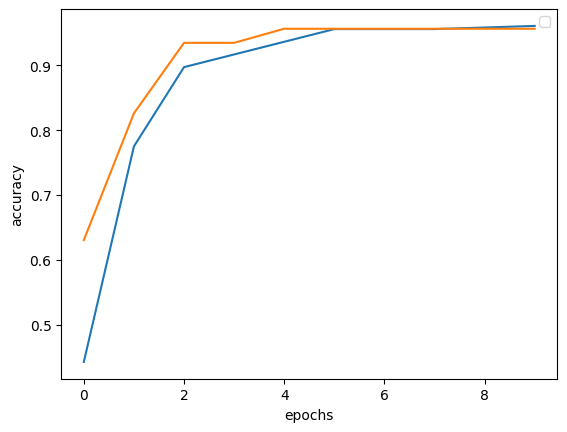

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

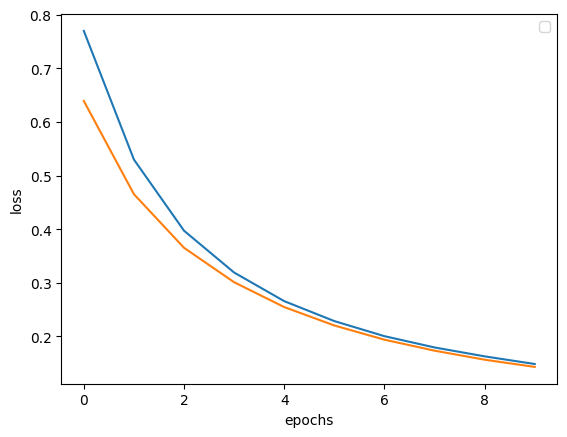

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**predictions**

In [52]:
y_pred=model.predict(X_test_std)
print(y_pred.shape)

4/4 [==============================] - 0s 7ms/step
(114, 2)


In [53]:
print(y_pred[0])

[0.34348994 0.5822478 ]


In [55]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-54-5c4fb8eb065c>, line 1)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


**BUILDING A SYSTEM**

In [63]:
input_data=(20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
)
input_data_as_array=np.asarray(input_data)
input_data_reshaped=input_data_as_array.reshape(1,-1)
input_data_std=sc.transform(input_data_reshaped)
prediction=model.predict(input_data_std)
print(predictions)
prediction_label=[np.argmax(prediction)]
if(prediction_label[0]==0):
  print("benign")
else:
  print("malignant")

1/1 [==============================] - 0s 37ms/step
[[1. 0.]]
benign
